# Enhancing Character Expressions through Color Manipulation

In this notebook, I will explore a method to transform an image by expanding each pixel into a $2\times 2$ block. The idea is to highlight a specific "mood" color along the diagonal of the block and place complementary color components in the off-diagonals. 

**Main Idea:**

- We use the idea that any color (represented as an RGB vector) can be expressed as a linear combination of a set of basis vectors.

- We select a 1D subspace (U) for the "mood" color and a 2D subspace (W) for the remaining colors.

- We expand each pixel into a $2\times 2$ block and apply the transformation to each block.

**Issue with the inirial approach:**

The linear combination below is for each pixel:

$$
p = c_1 \cdot \text{basis[0]} + c_2 \cdot \text{basis[1]} + c_3 \cdot \text{basis[2]}
$$

However, as we see in the lines below, $c_3 \cdot \text{basis[2]}$ is ignored:

```python
expanded_pixel[:][0][1] = coefficients[1] * basis[1]
expanded_pixel[:][1][0] = coefficients[1] * basis[1]
```

Because of this, the off-diagonal components are not being calculated correctly. Hence, the output image is not very clear and off.

<br>

***So lets fix it!***

## Setup 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

## Defining the Basis

This $3\times 3$ matrix represent basis vectors in RGB space:

- The **first basis vector** represents the "mood" color (subspace U).

- The **second and third basis vectors** represent the complementary color space (subspace W).

Any pixel (an RGB vector) can be written as a combination of these three basis vectors, by definition of basis.

In [2]:
basis = np.array([
    [.55, .93, .93], # Mood Color (subspace U)
    [.6, 0, .6], # vector 1 (subspace W)
    [0, .2, .6] # vector 2 (subspace W)
])

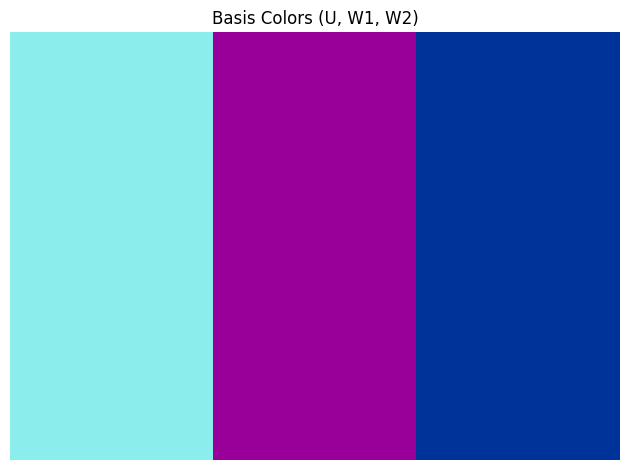

In [3]:
plt.imshow([basis], aspect='auto')
plt.title("Basis Colors (U, W1, W2)")
plt.axis('off')
plt.tight_layout()
plt.show()

## Exploring a single pixel

1. Taking a random pixel from the space.

In [4]:
pixel = np.array([[.3, .3, .1]])

2. Decomposing the Pixel's Color

For a pixel $p$, we solve:

  $$
  p = c_1 \cdot \text{basis[0]} + c_2 \cdot \text{basis[1]} + c_3 \cdot \text{basis[2]}
  $$


In [5]:
coefficients = np.linalg.solve(basis, pixel[0])
print("Coefficients:", coefficients)

Coefficients: [ 0.31742739 -0.04771784  0.18257261]


- **Components:**  

  - **Mood component:** $ \text{mood} = c_1 \times \text{basis[0]} $  

  - **Complementary component:** $ \text{comp} = c_2 \times \text{basis[1]} + c_3 \times \text{basis[2]} $
  
- **Assignment:**  

  - Diagonals (top-left and bottom-right): mood component.  

  - Off-diagonals (top-right and bottom-left): complementary component.

3. Now let's make a function to expand all the pixels in an image

In [6]:
def expand_pixel(pixel: np.array, basis: np.array) -> np.ndarray:
    coefficients = np.linalg.solve(basis, pixel[0])
    
    mood = coefficients[0] * basis[0]
    complement = coefficients[1] * basis[1] + coefficients[2] * basis[2]

    expanded_pixel = np.zeros((2, 2, 3))
    
    expanded_pixel[0, 0, :] = mood # Top-left
    expanded_pixel[1, 1, :] = mood # Bottom-right
    expanded_pixel[0, 1, :] = complement # Top-right
    expanded_pixel[1, 0, :] = complement # Bottom-left
    
    return expanded_pixel

4. Lets test the function on the pixel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


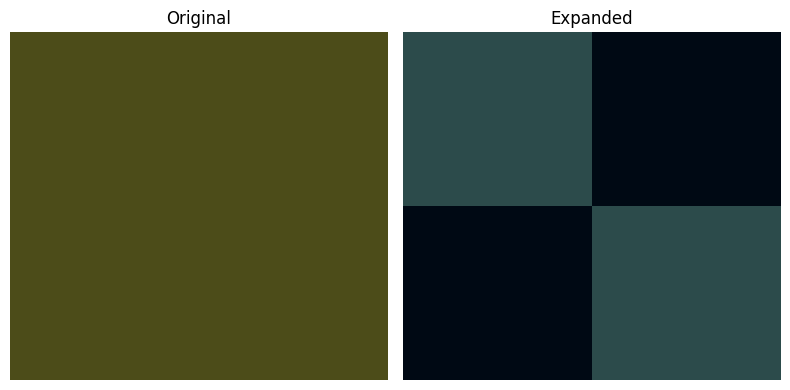

In [7]:
expanded_pixel = expand_pixel(pixel, basis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow([pixel], aspect='auto')
ax1.axis('off')
ax1.set_title("Original")

ax2.imshow(expanded_pixel, aspect='auto')
ax2.axis('off')
ax2.set_title("Expanded")

plt.tight_layout()
plt.show()

## Processing the Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


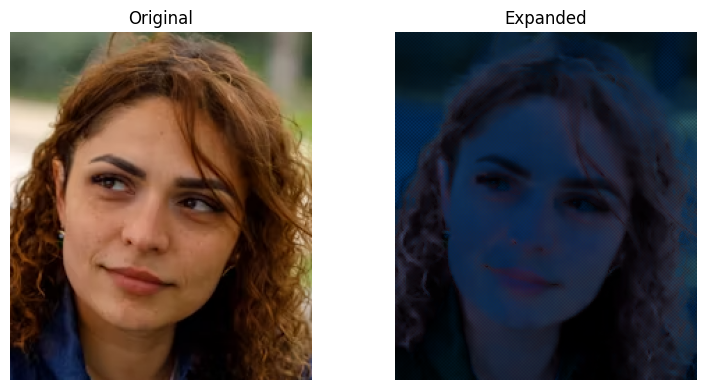

In [8]:
img = mpimg.imread('ambiguous.png')

# 
expanded_img = np.zeros((img.shape[0] * 2, img.shape[1] * 2, 3))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        block = expand_pixel([img[i][j]], basis)
        expanded_img[2*i:2*i+2, 2*j:2*j+2] = block

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title("Original")

ax2.imshow(expanded_img)
ax2.axis('off')
ax2.set_title("Expanded")

plt.tight_layout()
plt.show()

## Summary

The main issue with the original appraoch was that the second vector in the basis (basis[2]) was ignored. Now thats fixed and the results are much better :)